# Import Libraries & Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression 
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, balanced_accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, classification_report, precision_score, f1_score, precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, VotingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Read in Data

In [2]:
hate_10k = pd.read_csv('../Data/hate10k_clean.csv')
hate_10k.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,RT mayasolovely As a woman you shouldn't comp...
1,3,0,3,0,1,RT mleew17 boy dats cold...tyga dwn bad for c...
2,3,0,3,0,1,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...
3,3,0,2,1,1,RT C_G_Anderson viva_based she look like a tr...
4,6,0,6,0,1,RT ShenikaRoberts The shit you hear about me ...


# Describe 

In [3]:
#The whole df describe
hate_10k.describe()

,count,hate_speech,offensive_language,neither,class
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000
mean,3.22370,0.333500,2.323900,0.56630,1.095400
std,0.84447,0.693777,1.384189,1.13249,0.492263
min,3.00000,0.000000,0.000000,0.00000,0.000000
25%,3.00000,0.000000,2.000000,0.00000,1.000000
50%,3.00000,0.000000,3.000000,0.00000,1.000000
75%,3.00000,0.000000,3.000000,0.00000,1.000000
max,9.00000,7.000000,9.000000,9.00000,2.000000


In [4]:
#For the specific column
hate_10k['tweet'].describe()

count                                                 10000
unique                                                 9999
top       Chances make champions nicca ain't nothing sto...
freq                                                      2
Name: tweet, dtype: object

# Correlation Matrix

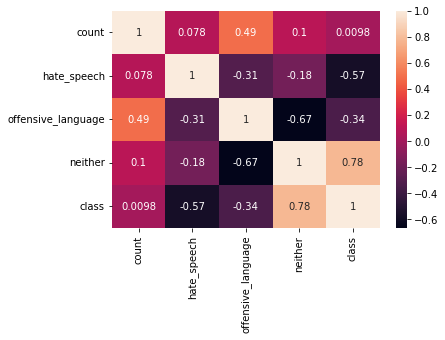

In [5]:
sns.heatmap(hate_10k.corr(), annot=True);

**Observations** There are few to no features from the correlation matrix that correlate with one another. The highest correlation within the matrix is neither, and class is 78%. Then offensive language and count have a 49% correlation which makes sense because offensive language accounts for 74% of the data. However, the neither and count correlation can be something to look further.  

# Value Counts

**Obersvation** The target can double as a baseline for my models. One can interpret the data frame as imbalanced data. It states over 7,486 rows (75%) where tweets are labeled "offensive but not hate speech—then leaving only 7% that is hate speech. 

In [112]:
#Class is my target for my models

#Legend:
# 0 = Hate speech
# 1 = Offensive language but not hate speech
# 2 = Neither hate nor offensive language

print(hate_10k['class'].value_counts())
print('---------------------------------')
print(hate_10k['class'].value_counts(normalize=True))

1    0.7486
2    0.1734
0    0.0780
Name: class, dtype: float64
---------------------------------
1    7486
2    1734
0     780
Name: class, dtype: int64


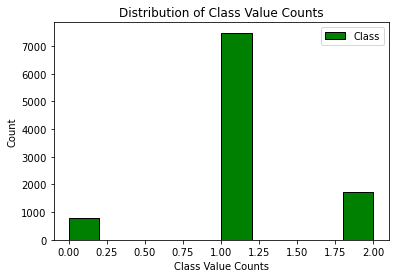

In [206]:
plt.hist(hate_10k['class'], bins=10, color='green', ec='black', label='Class');
plt.xlabel('Class Value Counts');
plt.ylabel('Count');
plt.legend();
plt.title("Distribution of Class Value Counts");

**Observation** For the value counts of the 'count' column, one can interpret that only three people have categorized the tweets for 93% of the rows in the data frame. Then only 0.59% of rows had nine people to categorize the tweets. I want to explore further which tweets are categorized by nine people. It makes me ask why only some tweets had 7-9 people vote compared to the majority of 3 people?

In [114]:
print(hate_10k['count'].value_counts())
print('---------------------------------')
print(hate_10k['count'].value_counts(normalize=True))

3    9259
6     590
4      85
9      59
7       7
Name: count, dtype: int64
---------------------------------
3    0.9259
6    0.0590
4    0.0085
9    0.0059
7    0.0007
Name: count, dtype: float64


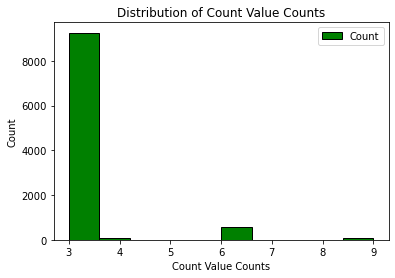

In [207]:
plt.hist(hate_10k['count'], bins=10, color='green', ec='black', label='Count');
plt.xlabel('Count Value Counts');
plt.ylabel('Count');
plt.legend();
plt.title("Distribution of Count Value Counts");

# Tweet Inspection

**Observation:** This is the section I consider EDA even though there are no charts or graphs. I wanted to find relationships within the tweet text and to see if any tweets have been been misclassified. 

In [124]:
#Created new df of only the tweets that used nine people to vote on
nine_votes = hate_10k.loc[hate_10k['count']==9]
nine_votes

,count,hate_speech,offensive_language,neither,class,tweet
80,9,0,7,2,1,"""BestProAdvice The facts on tattoos...tattoo h..."
713,9,0,0,9,2,#HOLIDAYSEASONLIVE ShyGlizzy plies Shy Glizzy ...
798,9,1,0,8,2,#WeAreRepublicNotRegime #POTUS BO violated USA...
1094,9,1,8,0,1,&#8220;Adrianmayer99 Fucking pussy&#8221; Jose...
1136,9,1,8,0,1,"&#8220;Benkasso I'll beat the pussy up, that's..."
1296,9,0,9,0,1,&#8220;Hermosa_Jayy Can I bring anotha bitch o...
1491,9,0,9,0,1,&#8220;RileyyBryn &#8220;devon_sheaa I just wa...
1568,9,1,8,0,1,&#8220;TinnyTimm &#9994;&#128558; u r gey af. ...
1574,9,1,7,1,1,&#8220;Traceydee98 I want pussy for dinner&#8221;
1600,9,0,9,0,1,"&#8220;WEEEDITH All I want is bitches, big boo..."


**Observation** I filtered the dataframe to the tweets that had nine people vote and categorized. With deeper inspection, I have observed that some tweets have been misclassified. There are tweets that should be considered hate speech but have been classified as neither. This clearly has bias within this algorithm. 

In [127]:
# Class Legend:
# 0 = Hate speech
# 1 = Offensive language but not hate speech
# 2 = Neither hate nor offensive language

print(nine_votes['class'].value_counts())
print('------------------------------')
print(nine_votes['class'].value_counts(normalize=True))

1    48
2     8
0     3
Name: class, dtype: int64
------------------------------
1    0.813559
2    0.135593
0    0.050847
Name: class, dtype: float64


In [131]:
# 5 voted hate, # 4 voted neither
# Classified as hate speech
hate_10k['tweet'].iloc[5749]

'clinchmtn316 sixonesixband AMERICA today, the rule of thumb is when in doubt, blame "whitey"'

In [129]:
# Classified as hate speech
# 7 voted hate, 1 voted offensive, 1 voted neither
hate_10k['tweet'].iloc[6171]

'infidelpamelaLC I\'m going to blame the black man, since they always blame "whitey" I\'m an equal opportunity hater.'

In [132]:
# Classified as hate speech
# 6 hate, 3 offensive
hate_10k['tweet'].iloc[6378]

"kcSnowWhite7 SamSaunders42 don't forget nappy headed, butt ugly bitch, who's married to a Muslim"

In [133]:
# Non-hate speech example which voted to class 1 which is offensive 
# 7 voted offensive, 2 voted neither
hate_10k['tweet'].iloc[80]


'"BestProAdvice The facts on tattoos...tattoo http//t.co/ZwnbhpDZ8e" he\'s a pussy with not tattooing them nipples'

# Misclassifications of Tweets

**Note for Presentation** This is a misclassifying example where only one person voted for hate speech while eight others voted that it is neither when this is clearly hate speech.

In [135]:
# Neither example in 9 people voted
# 1 hate speech, 8 neither
#although this is clearly hate speech

hate_10k['tweet'].iloc[798]

'#WeAreRepublicNotRegime #POTUS BO violated USA sovereignty w/open border/Jihadis/criminal/diseased/Haitians/S.Americans #ImpeachObama'

In [138]:
hate_10k.head(5)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,RT mayasolovely As a woman you shouldn't comp...
1,3,0,3,0,1,RT mleew17 boy dats cold...tyga dwn bad for c...
2,3,0,3,0,1,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...
3,3,0,2,1,1,RT C_G_Anderson viva_based she look like a tr...
4,6,0,6,0,1,RT ShenikaRoberts The shit you hear about me ...


In [139]:
# Three people voted
# 2 votes for offensive language, 1 vote for neither
#This clearly is hate speech and has been misclassified

hate_10k['tweet'].iloc[3]

' RT C_G_Anderson viva_based she look like a tranny'

In [140]:
# 3 votes for offensive but not hate speech 
# although that is considered hate speech to lgbtq community

hate_10k['tweet'].iloc[86]

'"BrokenPiecesmsc ItsNotAdam faggot read my tweets after dat k" it wasn\'t even funny lol'

In [160]:
# Voted Offensive & neither
#Clearly offensive and not neither or a contradiction

hate_10k['tweet'].iloc[231]

'"Shaa_Jenkins If ya bitch always bitching clearly she care" Or just an annoying Bitch'

# Hate Speech Examples

In [152]:
hs_df = hate_10k.loc[hate_10k['class']==0]
hs_df

,count,hate_speech,offensive_language,neither,class,tweet
85,3,2,1,0,0,"""Blackman38Tide WhaleLookyHere HowdyDowdy11 qu..."
89,3,3,0,0,0,"""CB_Baby24 white_thunduh alsarabsss"" hes a bea..."
110,3,3,0,0,0,"""DevilGrimz VigxRArts you're fucking gay, blac..."
184,3,3,0,0,0,"""MarkRoundtreeJr LMFAOOOO I HATE BLACK PEOPLE ..."
202,3,2,1,0,0,"""NoChillPaz ""At least I'm not a nigger"" http//..."
...,...,...,...,...,...,...
9837,3,3,0,0,0,Hitler didn't finish it. Can u. If a nigger ur...
9862,3,2,1,0,0,"Hoes thnk they ""won"" when the nigga thats ridi..."
9873,3,2,1,0,0,Holder&#8217;s Justice Department Isn&#8217;t ...
9887,3,2,1,0,0,Hood niggas and bitches love emojis lmfao


In [136]:
#This code is used to classify tweets by their class
#Hate speech class, 0
hate_10k.loc[hate_10k['class']==0, 'tweet']

85      "Blackman38Tide WhaleLookyHere HowdyDowdy11 qu...
89      "CB_Baby24 white_thunduh alsarabsss" hes a bea...
110     "DevilGrimz VigxRArts you're fucking gay, blac...
184     "MarkRoundtreeJr LMFAOOOO I HATE BLACK PEOPLE ...
202     "NoChillPaz "At least I'm not a nigger" http//...
                              ...                        
9837    Hitler didn't finish it. Can u. If a nigger ur...
9862    Hoes thnk they "won" when the nigga thats ridi...
9873    Holder&#8217;s Justice Department Isn&#8217;t ...
9887            Hood niggas and bitches love emojis lmfao
9978    I ain't been to the fair since I was like 8 an...
Name: tweet, Length: 780, dtype: object

In [118]:
# 3 votes for hs
# Hate speech example
hate_10k['tweet'].iloc[184]

'"MarkRoundtreeJr LMFAOOOO I HATE BLACK PEOPLE https//t.co/RNvD2nLCDR" This is why there\'s black people and niggers'

**Observation** This tweet below has the word "gay" in it which was voted into hate speech but "queer" or "tranny" is not. This demonstrates a bias. 

In [117]:
# 3 votes for hs
# Hate speech example
hate_10k['tweet'].iloc[110]

'"DevilGrimz VigxRArts you\'re fucking gay, blacklisted hoe" Holding out for #TehGodClan anyway http//t.co/xUCcwoetmn'

In [13]:
# 2 votes hs, 1 vote offensive
# Hate speech example
hate_10k['tweet'].iloc[85]

'"Blackman38Tide WhaleLookyHere HowdyDowdy11 queer" gaywad'

In [16]:
# Hate speech example
hate_10k['tweet'].iloc[9837]

"Hitler didn't finish it. Can u. If a nigger ur Jew confronts u in the street what then."

# Neither Classification Examples

In [154]:
nt_df = hate_10k.loc[hate_10k['class']==2]
nt_df.head(55)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,RT mayasolovely As a woman you shouldn't comp...
40,3,0,1,2,2,""" momma said no pussy cats inside my doghouse """
63,3,0,0,3,2,"""Addicted2Guys -SimplyAddictedToGuys http//t.c..."
66,3,0,1,2,2,"""AllAboutManFeet http//t.co/3gzUpfuMev"" woof w..."
67,3,0,1,2,2,"""Allyhaaaaa Lemmie eat a Oreo &amp; do these d..."
70,3,0,0,3,2,"""ArizonasFinest6 Why the eggplant emoji doe?""y..."
75,3,0,1,2,2,"""BabyAnimalPics baby monkey bathtime http//t.c..."
115,3,0,0,3,2,"""DomWorldPeace Baseball season for the win. #Y..."
118,3,0,0,3,2,"""DunderbaIl I'm an early bird and I'm a night ..."
119,3,0,1,2,2,"""EdgarPixar Overdosing on heavy drugs doesn't ..."


In [17]:
# Neither Classification Examples
hate_10k.loc[hate_10k['class']==2, 'tweet']

0        RT mayasolovely As a woman you shouldn't comp...
40        " momma said no pussy cats inside my doghouse "
63      "Addicted2Guys -SimplyAddictedToGuys http//t.c...
66      "AllAboutManFeet http//t.co/3gzUpfuMev" woof w...
67      "Allyhaaaaa Lemmie eat a Oreo &amp; do these d...
                              ...                        
9930                                    How now, gung-ho?
9933    How the hell was David Murphy's hit not a home...
9952    Hugs or Kisses? &#8212; Hugs. It gives you a w...
9966    I I haven't watched a single episode of #LHHNY...
9968    I LOVE my 10 &amp; 5 but most days they remind...
Name: tweet, Length: 1734, dtype: object

In [155]:
# 1 vote hs, 2 neither

hate_10k['tweet'].iloc[379]

'"rhythmixx_ I told Mariam to but cigarettes for her birthday"\n\nYou also called me trash rn'

In [156]:
# 1 vote hs, 2 neither

hate_10k['tweet'].iloc[395]

'"socass_ Dude remember this wop video? 00sexilexi00 http//t.co/P3HEuBOQBu" OMG WHERE DID YOU FIND THAT'

In [157]:
# 2 offensive, 4 neither
hate_10k['tweet'].iloc[391]

'"sleepy_yongguk "I saw an ajumma walk out in the beginning saying, \'Wow, this is so trash that I can\'t even listen to it..\'" &#128514;" lmaoo'

In [159]:
# 1 offensive, 2 neither
hate_10k['tweet'].iloc[323]

'"deepthroatMike "Boys_South Take me for a ride &#128525;&#128139; http//t.co/H5mAtjYfGA"#redneck" woof woof'

# Most Common Words in Each Category

In [22]:
from collections import Counter

**Most Common Overall**

In [31]:
#Code from StackOverflow 

most_common_words = Counter(" ".join(hate_10k['tweet']).split()).most_common(100)
most_common_words

[('a', 3255),
 ('bitch', 2642),
 ('the', 2444),
 ('I', 2135),
 ('you', 2109),
 ('to', 1846),
 ('and', 1416),
 ('that', 1290),
 ('my', 1091),
 ('in', 1029),
 ('is', 998),
 ('like', 944),
 ('of', 869),
 ('on', 845),
 ('me', 835),
 ('be', 824),
 ('bitches', 753),
 ('pussy', 739),
 ('for', 697),
 ('ass', 662),
 ('your', 614),
 ('hoes', 613),
 ('it', 593),
 ('with', 592),
 ('hoe', 587),
 ('this', 566),
 ('u', 559),
 ('up', 558),
 ("I'm", 548),
 ('get', 517),
 ('was', 466),
 ('fuck', 465),
 ('but', 455),
 ('just', 448),
 ('all', 447),
 ("don't", 424),
 ('they', 418),
 ('not', 412),
 ('shit', 408),
 ('are', 407),
 ('so', 406),
 ('got', 401),
 ('no', 396),
 ('nigga', 385),
 ('lol', 370),
 ('at', 368),
 ('out', 360),
 ('have', 355),
 ('trash', 343),
 ('he', 337),
 ('about', 317),
 ('these', 317),
 ('i', 298),
 ('do', 294),
 ('her', 292),
 ("ain't", 291),
 ('if', 288),
 ('some', 286),
 ('we', 281),
 ('what', 279),
 ('RT', 276),
 ('can', 272),
 ('know', 268),
 ('when', 268),
 ('them', 260),
 ('&a

**Hate Speech Common Words**

In [203]:
#Hate Speech 100 common words
common_hate_speech = Counter(" ".join(hate_10k.loc[hate_10k['class']==0, 'tweet']).split()).most_common(15)
common_hate_speech

[('a', 272),
 ('you', 214),
 ('the', 185),
 ('to', 157),
 ('I', 127),
 ('and', 117),
 ('is', 100),
 ('that', 97),
 ('faggot', 95),
 ('bitch', 87),
 ('like', 86),
 ('ass', 86),
 ('in', 82),
 ('of', 79),
 ('your', 72)]

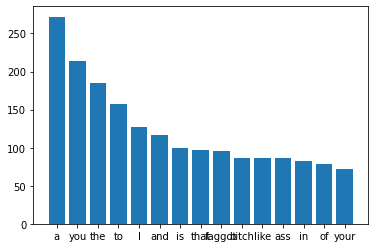

In [204]:
hs_dict = dict(common_hate_speech)
words = list(hs_dict.keys())
values = list(hs_dict.values())

plt.bar(range(len(hs_dict)), values, tick_label=words)
plt.savefig('bar.png')
plt.show()

**Neither Common Words**

In [37]:
common_neither = Counter(" ".join(hate_10k.loc[hate_10k['class']==2, 'tweet']).split()).most_common(100)
common_neither

[('the', 672),
 ('a', 490),
 ('to', 351),
 ('I', 348),
 ('and', 334),
 ('is', 240),
 ('in', 233),
 ('of', 233),
 ('trash', 205),
 ('you', 203),
 ('for', 182),
 ('that', 161),
 ('on', 144),
 ('be', 126),
 ('my', 117),
 ('it', 113),
 ('like', 105),
 ('are', 103),
 ('with', 101),
 ('just', 95),
 ('me', 94),
 ('bird', 93),
 ('your', 88),
 ('yellow', 87),
 ('this', 86),
 ('was', 86),
 ('have', 85),
 ('Charlie', 81),
 ('not', 75),
 ('they', 71),
 ('but', 71),
 ("I'm", 70),
 ('all', 70),
 ('he', 68),
 ('up', 67),
 ('Yankees', 66),
 ('at', 66),
 ('get', 58),
 ('out', 58),
 ('-', 58),
 ('we', 55),
 ('&#9733;', 54),
 ('about', 53),
 ('so', 53),
 ('from', 53),
 ('birds', 50),
 ('or', 50),
 ('&amp;', 49),
 ('as', 49),
 ("don't", 49),
 ('some', 47),
 ('colored', 46),
 ('u', 44),
 ('RT', 42),
 ('would', 42),
 ('one', 42),
 ('no', 40),
 ('got', 40),
 ('lol', 40),
 ('can', 40),
 ('will', 38),
 ('his', 38),
 ('You', 38),
 ('i', 38),
 ('what', 38),
 ('ghetto', 38),
 ('an', 37),
 ('#Yankees', 36),
 ('do'

**Offensive Common Words**

In [201]:
common_offensive = Counter(" ".join(hate_10k.loc[hate_10k['class']==1, 'tweet']).split()).most_common(20)
common_offensive

[('bitch', 2551),
 ('a', 2493),
 ('you', 1692),
 ('I', 1660),
 ('the', 1587),
 ('to', 1338),
 ('that', 1032),
 ('and', 965),
 ('my', 920),
 ('like', 753),
 ('bitches', 736),
 ('pussy', 715),
 ('in', 714),
 ('me', 700),
 ('on', 661),
 ('is', 658),
 ('be', 633),
 ('hoes', 598),
 ('ass', 575),
 ('hoe', 563)]

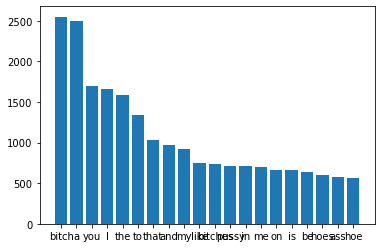

In [202]:
common_offensive_dict = dict(common_offensive)
words = list(common_offensive_dict.keys())
values = list(common_offensive_dict.values())

plt.bar(range(len(common_offensive_dict)), values, tick_label=words)
plt.savefig('bar.png')
plt.show()

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f92e413e550>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py", line 222, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
  File "_pydevd_bundle/pydevd_cython.pyx", line 1363, in _pydevd_bundle.pydevd_cython.SafeCallWrapper.__call__
  File "_pydevd_bundle/pydevd_cython.pyx", line 1664, in _pydevd_bundle.pydevd_cython.ThreadTracer.__call__
  File "/opt/anaconda3/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_is_thread_alive.py", line 9, in is_thread_alive
    def is_thread_alive(t):
KeyboardInterrupt: 


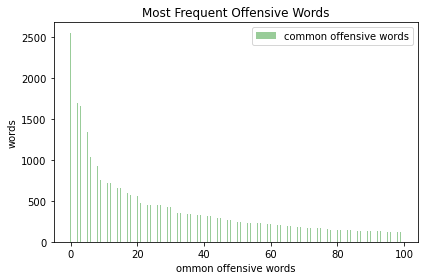

In [199]:
#Code from StackOverflow
data = common_offensive
n_groups = len(data)

vals = [x[1] for x in data]
key = [x[0] for x in data]

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.4

rects1 = plt.bar(index, vals, bar_width,
                alpha=opacity, color='green', label='common offensive words')

plt.xlabel('Common offensive words')
plt.ylabel('words')
plt.title('Most Frequent Offensive Words')
plt.legend()

plt.tight_layout()
plt.show()

**Tweet Lengths**

In [42]:
tweets_copy = hate_10k.copy()
tweets_copy

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,RT mayasolovely As a woman you shouldn't comp...
1,3,0,3,0,1,RT mleew17 boy dats cold...tyga dwn bad for c...
2,3,0,3,0,1,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...
3,3,0,2,1,1,RT C_G_Anderson viva_based she look like a tr...
4,6,0,6,0,1,RT ShenikaRoberts The shit you hear about me ...
...,...,...,...,...,...,...
9995,3,0,3,0,1,"I ain't trying to fuck, bitch. I just want wings."
9996,6,0,6,0,1,I aint mad at you bitches thats what hoes do
9997,3,0,3,0,1,"I aint mad at you, thats what hoes do"
9998,3,0,3,0,1,I aint never had a prob with no other bitch ov...


# Tweet Length & Word Counts

In [44]:
tweets_copy['tweet_length'] = tweets_copy['tweet'].str.len()
tweets_copy.head()

,count,hate_speech,offensive_language,neither,class,tweet,tweet_length
0,3,0,0,3,2,RT mayasolovely As a woman you shouldn't comp...,135
1,3,0,3,0,1,RT mleew17 boy dats cold...tyga dwn bad for c...,76
2,3,0,3,0,1,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...,106
3,3,0,2,1,1,RT C_G_Anderson viva_based she look like a tr...,50
4,6,0,6,0,1,RT ShenikaRoberts The shit you hear about me ...,122


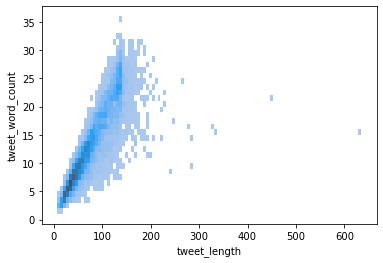

In [180]:
sns.histplot(data=tweets_copy, x='tweet_length', y='tweet_word_count', legend=True);

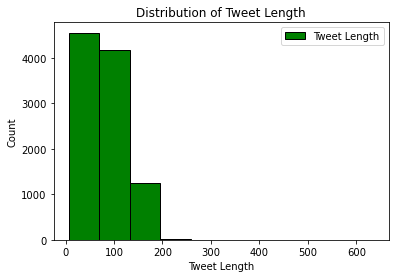

In [189]:
#Try to change the bin size

plt.hist(tweets_copy['tweet_length'], bins=10, color='green', ec='black', label='Tweet Length');
plt.xlabel('Tweet Length');
plt.ylabel('Count');
plt.legend();
plt.title("Distribution of Tweet Length");

In [162]:
tweets_copy['tweet_word_count'] = tweets_copy['tweet'].str.split().str.len()
tweets_copy.head()

,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,tweet_word_count
0,3,0,0,3,2,RT mayasolovely As a woman you shouldn't comp...,135,24
1,3,0,3,0,1,RT mleew17 boy dats cold...tyga dwn bad for c...,76,15
2,3,0,3,0,1,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...,106,20
3,3,0,2,1,1,RT C_G_Anderson viva_based she look like a tr...,50,8
4,6,0,6,0,1,RT ShenikaRoberts The shit you hear about me ...,122,25


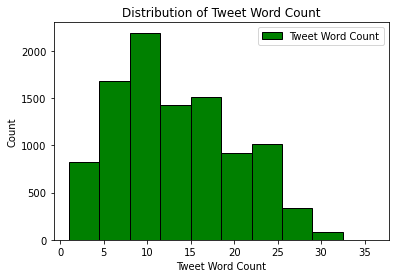

In [186]:
plt.hist(tweets_copy['tweet_word_count'], bins=10, color='green', ec='black', label='Tweet Word Count');
plt.xlabel('Tweet Word Count');
plt.ylabel('Count');
plt.legend();
plt.title("Distribution of Tweet Word Count");

In [163]:
tweets_copy.nlargest(15, 'tweet_length')

,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,tweet_word_count
1596,3,0,3,0,1,&#8220;Untouchable_T Never seen so many perfec...,635,15
7433,3,0,2,1,1,A guy on True Blood is getting his penis inspe...,452,21
1120,3,0,3,0,1,&#8220;BIGHOMIEMARKIE &#8220;1017_Sqquad &#822...,335,15
1409,3,0,3,0,1,&#8220;Marlin_FishyAss &#8220;1017_Sqquad In t...,326,16
1503,3,0,3,0,1,&#8220;SALUTEmyRainbow &#8220;thatkiduriah bit...,287,9
5270,3,0,3,0,1,ZitlalyL &#128529;&#128529;&#128529;&#128529;&...,282,14
553,3,1,2,0,1,"""She's from Florida so you've got to do the sn...",277,16
8760,3,0,3,0,1,Do we love these hoes?\n\n&#128514; &#128514; ...,267,24
1825,3,2,1,0,0,&#8220;kitty_hello14 Im_Yung_Jay &#127850;&#12...,250,17
998,6,0,6,0,1,&#128514;&#128514;&#128514;&#128514;&#128514; ...,239,8


In [164]:
# There have been some misynogy and homophobia within the tweets being classified
# Been categorized as neither. 
tweets_copy['tweet'].iloc[231]

'"Shaa_Jenkins If ya bitch always bitching clearly she care" Or just an annoying Bitch'

In [167]:
# 1 hate, 2 offensive
tweets_copy['tweet'].iloc[553]

'"She\'s from Florida so you\'ve got to do the sniff test in those swamp pussies" &#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128553;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;'

In [165]:
tweets_copy.nsmallest(15, 'tweet_length')

,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,tweet_word_count
8944,3,0,3,0,1,Emd hoe,7,2
804,3,0,0,3,2,#Yankees,8,1
7872,3,0,3,0,1,Ayee hoe,8,2
9192,3,0,1,2,2,Free wop,8,2
9607,3,0,3,0,1,Ha bitch,8,2
2289,3,0,3,0,1,me bitch,9,2
8593,3,0,3,0,1,Da fuq ho,9,3
8737,3,0,3,0,1,Dirty hoe,9,2
8895,3,0,3,0,1,Dumb cunt,9,2
9059,3,1,2,0,1,Fat bitch,9,2


In [82]:
# 4 hate, 2 offensive
# Once again, fag is not treated like other hate speech words, it should all be in the hs category
tweets_copy['tweet'].iloc[5274]

'Zwaaad fag'

In [166]:
# 3 vote hate speech, 6 neither
tweets_copy['tweet'].iloc[8889]

'Dumb bitch'

**Observation** It seems the tweets with hate speech tend to have the lowest text length. I guess you do not have to write much for it to be considered hate speech. 

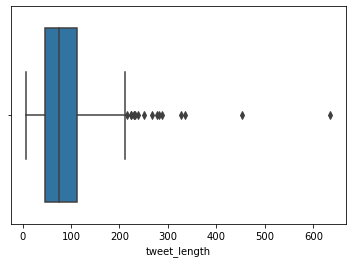

In [60]:
sns.boxplot(data=tweets_copy, x=tweets_copy['tweet_length']);

In [168]:
tweets_copy.tail(25)

,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,tweet_word_count
9975,3,0,3,0,1,I ain't Neva care what ah bitch had to say bou...,50,12
9976,3,0,3,0,1,I ain't a killer but don't push me. Revenge is...,90,18
9977,3,0,3,0,1,"I ain't afraid to cut a bitch, or open a packa...",92,15
9978,3,2,1,0,0,I ain't been to the fair since I was like 8 an...,129,28
9979,3,1,2,0,1,I ain't bout to listen to this nigga rap about...,59,12
9980,3,0,3,0,1,I ain't buying no pussy I got too many followe...,57,12
9981,3,0,3,0,1,I ain't cuffing no bitch that's out here posti...,87,16
9982,3,0,3,0,1,I ain't cutting my hair for u hoes at hc,40,10
9983,3,0,3,0,1,I ain't don't turnin up bitch,29,6
9984,3,0,3,0,1,I ain't even know white girls had good pussy l...,81,16


# Groupbys

# Divide by counts

In [115]:
hate_10k.groupby('class').mean().T

class,0,1,2
count,3.098718,3.244323,3.190888
hate_speech,2.261538,0.192760,0.073818
offensive_language,0.753846,2.962330,0.273933
neither,0.083333,0.089233,2.843137


In [116]:
hate_10k.groupby('count').mean().T

count,3,4,6,7,9
hate_speech,0.321633,0.317647,0.442373,1.428571,1.000000
offensive_language,2.141268,3.117647,4.616949,4.571429,6.644068
neither,0.537099,0.564706,0.940678,1.000000,1.355932
class,1.093855,1.094118,1.122034,1.000000,1.084746


In [88]:
#There are 59 rows that have the count of 9 people
#The are 9,259 rows that have a vote of 3 count aka ppl voting
tweets_copy.groupby('count')['hate_speech'].count()

count
3    9259
4      85
6     590
7       7
9      59
Name: hate_speech, dtype: int64

In [66]:
#Total number of rows that have 0 hate speech in it
#there are 1 row of seven people that counted for hate speech

tweets_copy.groupby('hate_speech')['tweet_length'].count()

hate_speech
0    7703
1    1468
2     650
3     161
4      11
5       3
6       3
7       1
Name: tweet_length, dtype: int64

In [84]:
#No. f unique tweet length aka 204 different unique lengths in no hate speech
tweets_copy.groupby('hate_speech')['tweet_length'].nunique()

hate_speech
0    204
1    161
2    142
3     95
4     11
5      3
6      3
7      1
Name: tweet_length, dtype: int64

In [92]:
tweets_copy.groupby('offensive_language')['count'].count()

offensive_language
0    1477
1    1013
2    1802
3    5135
4      91
5     138
6     299
7      12
8      12
9      21
Name: count, dtype: int64

In [85]:
#Number of tweet lengths that are unqiue in this category
tweets_copy.groupby('offensive_language')['tweet_length'].nunique()

offensive_language
0    156
1    156
2    168
3    197
4     66
5     86
6    136
7     12
8     12
9     18
Name: tweet_length, dtype: int64

In [91]:
tweets_copy.groupby('neither')['count'].count()
#There are 3 rows where the neither value is 9

neither
0    7550
1     702
2     532
3    1120
4      16
5      25
6      47
7       1
8       4
9       3
Name: count, dtype: int64

In [86]:
#Number of tweet lengths that are unqiue in this category
tweets_copy.groupby('neither')['tweet_length'].nunique()

neither
0    207
1    152
2    143
3    152
4     14
5     18
6     39
7      1
8      4
9      3
Name: tweet_length, dtype: int64

In [ ]:
tweets_copy.nunique()

In [83]:
# the avg tweet length for each hate speech
tweets_copy.groupby('hate_speech')['tweet_length'].mean()

hate_speech
0     80.117227
1     81.333106
2     78.927692
3     85.577640
4     69.818182
5    116.000000
6     67.333333
7    114.000000
Name: tweet_length, dtype: float64

In [73]:
tweets_copy.groupby('class')['tweet_length'].mean()

class
0    80.132051
1    78.643201
2    87.558824
Name: tweet_length, dtype: float64

In [75]:
tweets_copy.loc[tweets_copy['class']==0, 'tweet_length']

85       57
89       80
110     115
184     114
202      69
       ... 
9837     87
9862    137
9873    149
9887     41
9978    129
Name: tweet_length, Length: 780, dtype: int64

In [79]:
#129 characters
tweets_copy['tweet'].iloc[9978]

"I ain't been to the fair since I was like 8 and I haven't wanted to go since then either for some reason. Too many niggers for me"

# Charts & Graphs

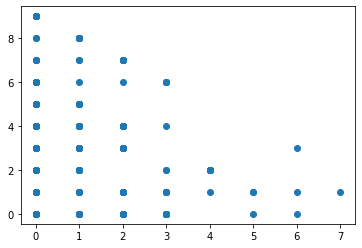

In [151]:
plt.scatter(x=hate_10k['hate_speech'], y = hate_10k['offensive_language']); 


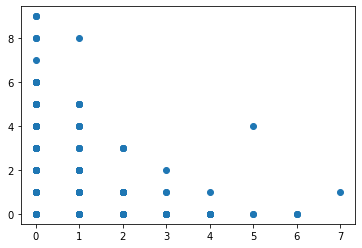

In [148]:
plt.scatter(x=hate_10k['hate_speech'],
            y = hate_10k['neither']);   

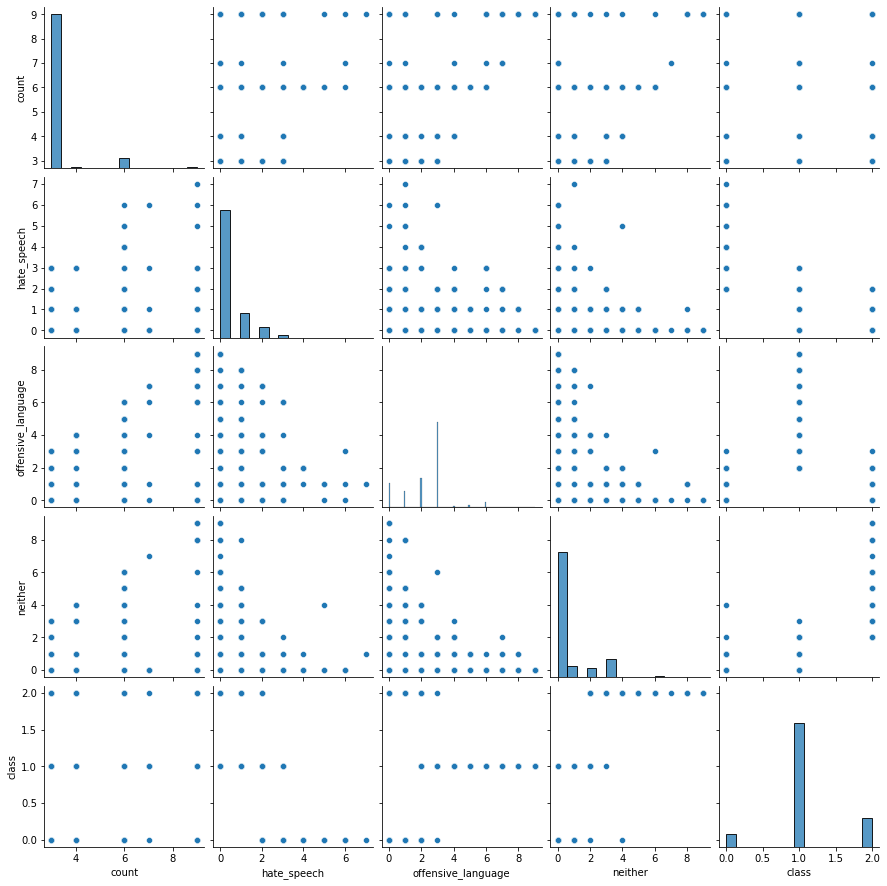

In [144]:
sns.pairplot(hate_10k)